# Figure 4 Fmax MLT Distribution
In this notebook we demonstrate how to plot the distribution of the frequency minimum of AKR within bursts and how to fit a kernal density estimate

## Set Epoch Range for Analysis in minutes

In [7]:
import matplotlib.pyplot as plt
import numpy as np
epoch_range= 0, 183/60


## Load AKR Frequency Limits and Add WIND Position
Here we load the akr frequency limits that includes substorm epoch that we made in the notebook Defining_Substorm_Epoch.ipynb. We then interpolate the location of WIND onto the time steps in the akr frequency limits dataframe

In [8]:
import pandas as pd
import matplotlib.dates as mdates
akr_flims= pd.read_csv('../Example_Data/Full_Run_Through/akr_substorm_epoch.csv', parse_dates=['Date_UTC'])
akr_flims.sort_values('Date_UTC', inplace=True)
wind_position= pd.read_csv('../Example_Data/Full_Run_Through/WIND_Position_Mag.csv', parse_dates=['Date_UTC'])
def interps(x, *args):
    from scipy.interpolate import interp1d
    return [interp1d(x, arg, fill_value="extrapolate") for arg in args]
position_funcs= interps(mdates.date2num(wind_position['Date_UTC'].values),
                            wind_position.R.values,
                            wind_position.mlt.values,
                            wind_position.mlat.values)

for col, func in zip(['R', 'MLT', 'MLAT'], position_funcs):
    akr_flims[col]= func(mdates.date2num((akr_flims['Date_UTC'].values)))

## Ridgeline
We use the pre-made mlt_ridge_plot function.

(<Figure size 1300x2000 with 5 Axes>,
 <Axes: xlabel='Maximum Frequency [kHz]'>,
 <Axes: >,
 <Axes: title={'center': 'Number of Data Points'}>,
 <Axes: title={'center': 'Epoch [min] Time Line'}>,
 <Axes: >)

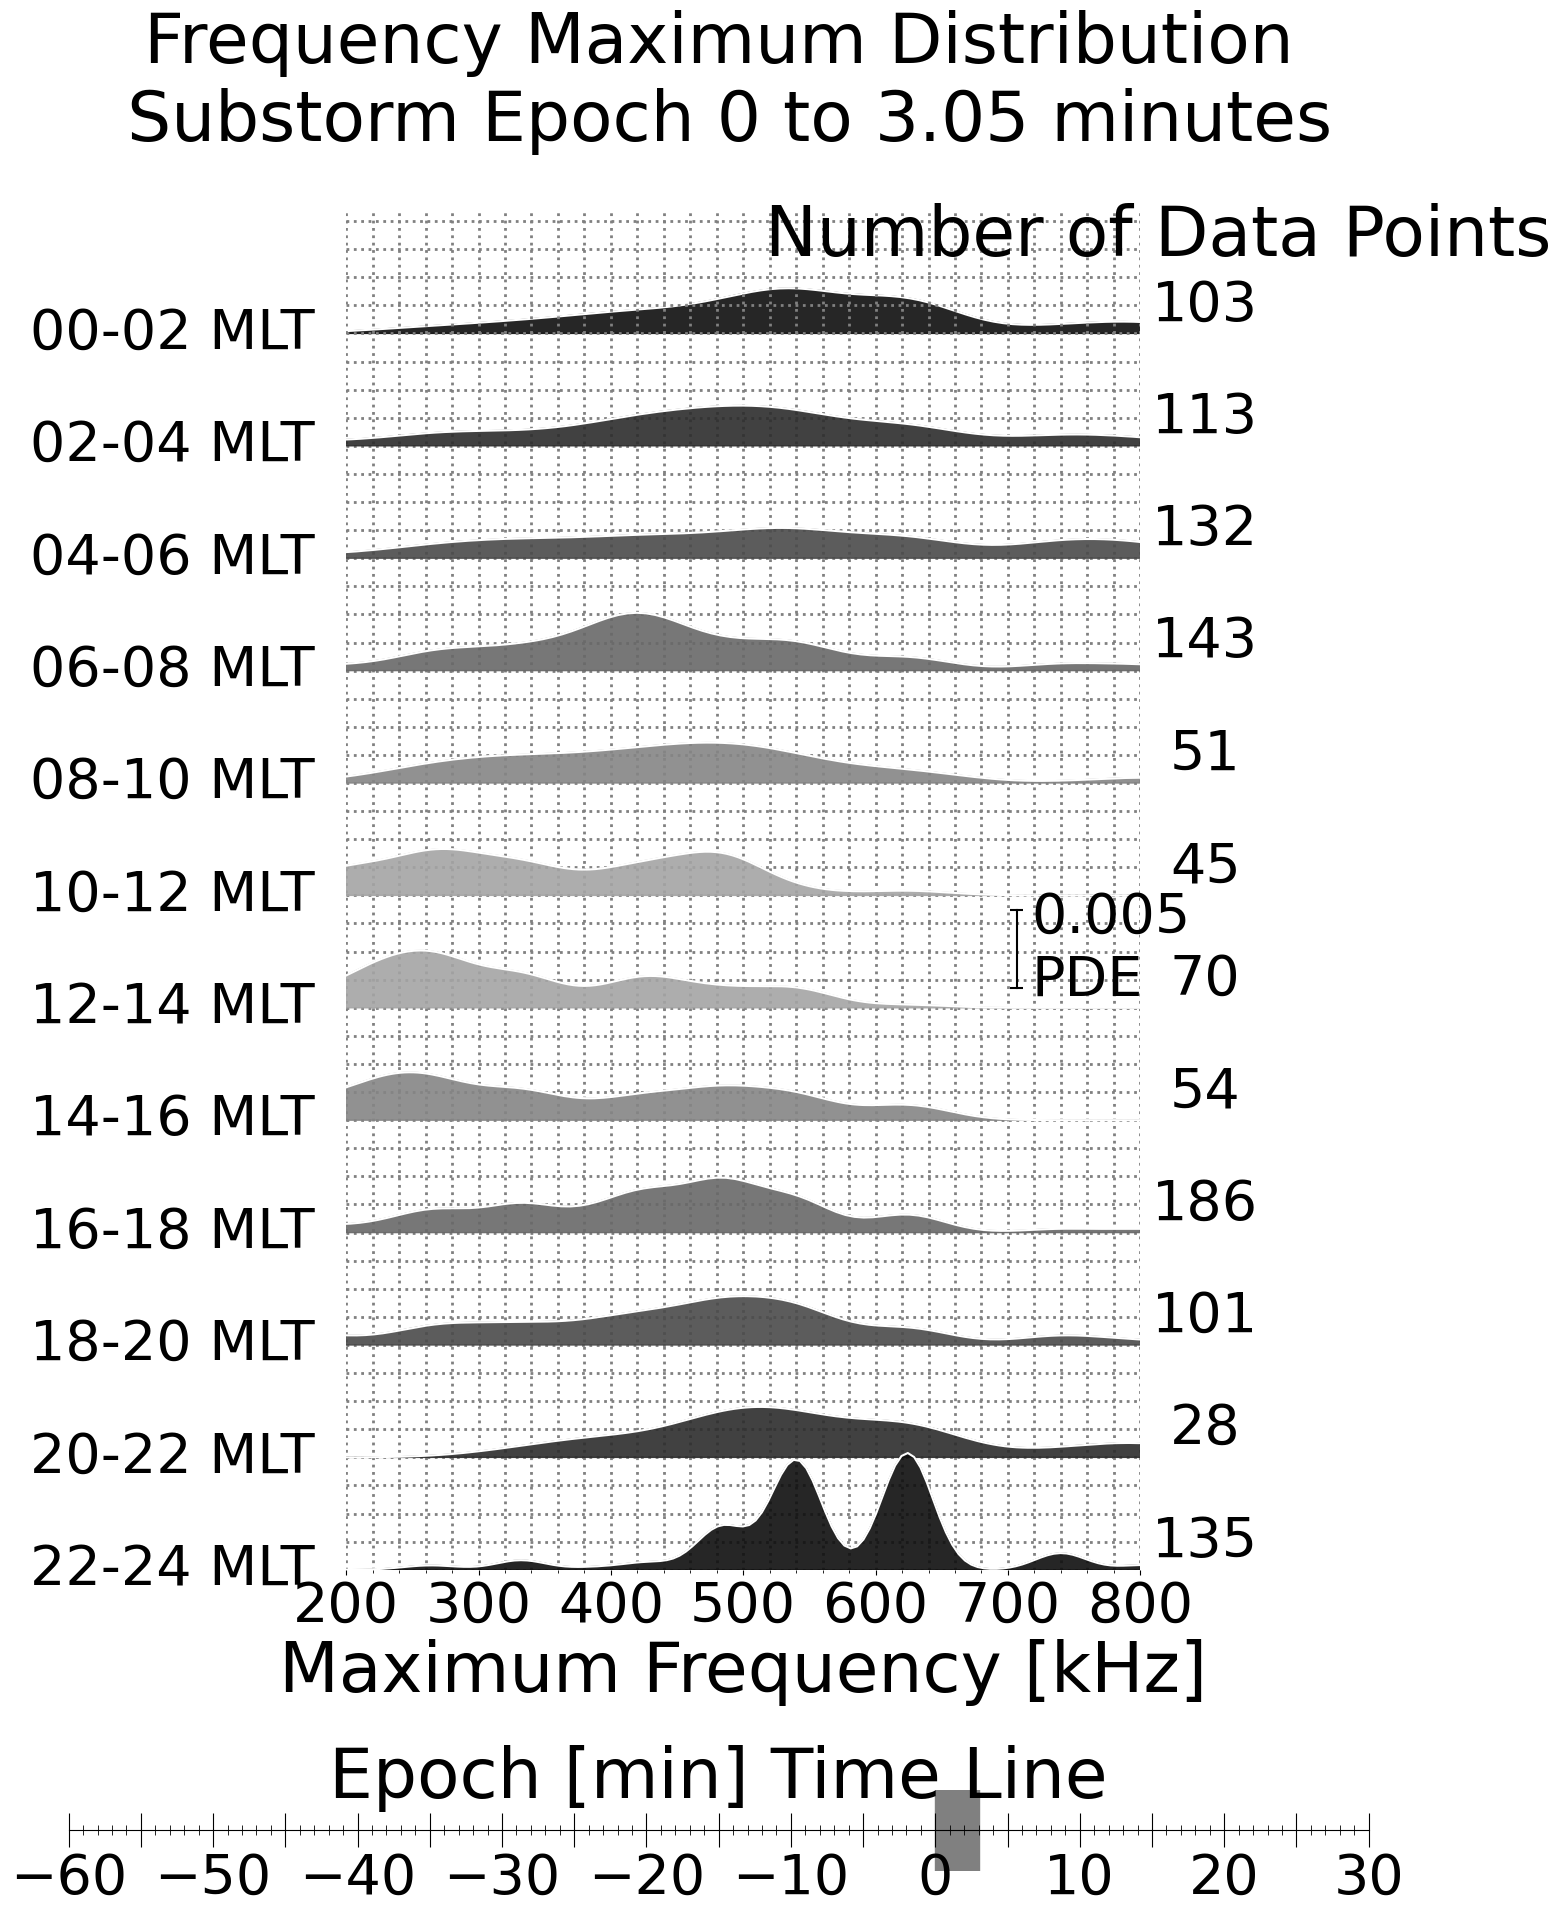

In [9]:
from Wind_Waves.plotting_tools import mlt_ridge_plot
mlt_ridge_plot(akr_flims, var_col='fmax', Epoch_column='combined', Epoch_range=epoch_range, MLT='MLT',
                min_f=200, max_f=800, hist=False, 
                xlabel='Maximum Frequency [kHz]', axis_label_size=50, label_fontsize=40, whisker_x=0.3, whisker_y=.6,
                figtitle= lambda t1, t2: f'Frequency Maximum Distribution\n Substorm Epoch {t1} to {t2} minutes',
                    freqs= np.array([  20,   24,   28,   32,   36,   40,   44,   48,   52,   60,   72,
                    80,   92,  104,  124,  136,  148,  176,  196,  224,  256,  272,
                    332,  388,  428,  484,  540,  624,  740,  804,  940, 1040]), # These are the typical 32 frequencies measured
                )